In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv


In [2]:
import pandas as pd
import nltk
import unicodedata
import sys
import string
nltk.download('vader_lexicon')
import time
import csv
import matplotlib.pyplot as plt

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [3]:
df_clothes = pd.read_csv("../input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv")
df_clothes.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


CLeaning and Graph Analysis

In [4]:
df_clothes.dropna(inplace=True)

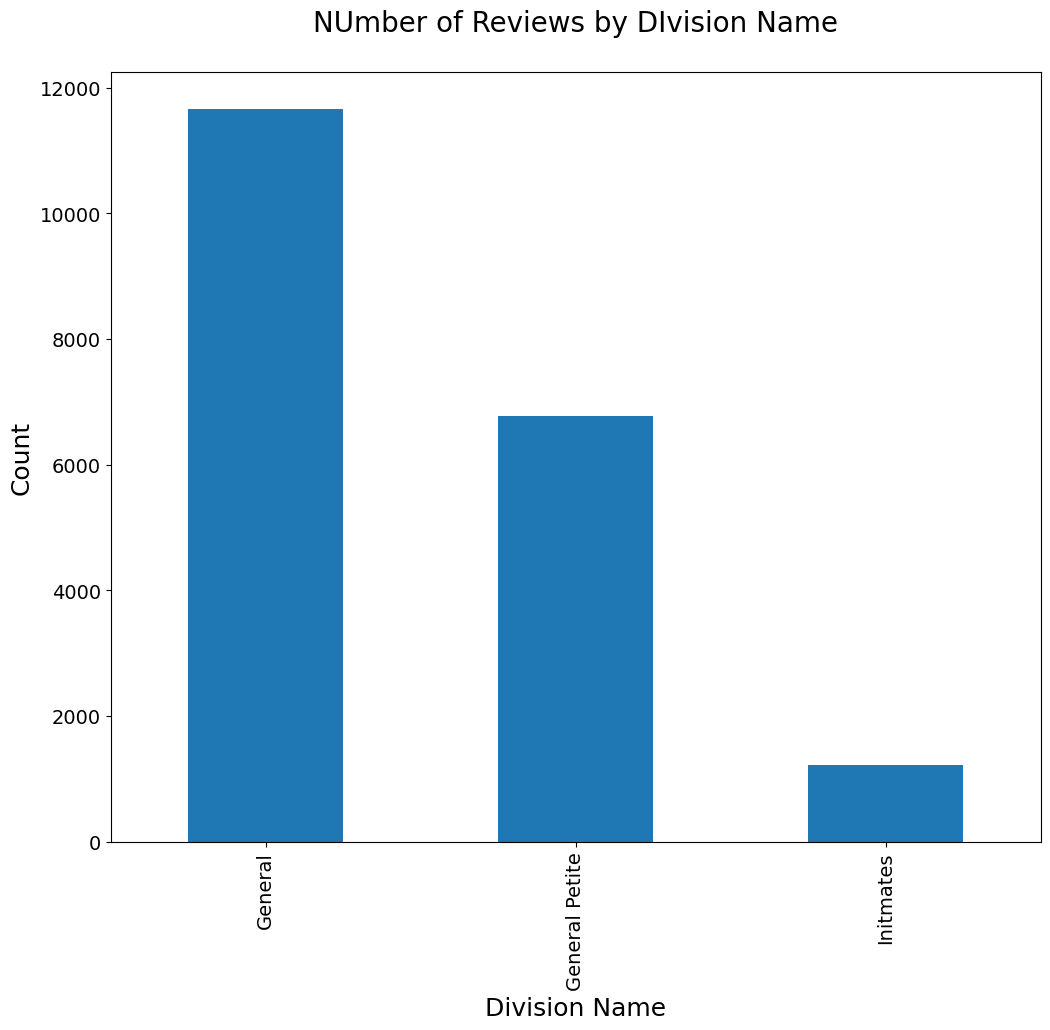

In [5]:
ax = df_clothes['Division Name'].value_counts().sort_index().plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('NUmber of Reviews by DIvision Name\n', fontsize=20)
ax.set_xlabel('Division Name', fontsize=18)
ax.set_ylabel('Count', fontsize=18);
plt.show()

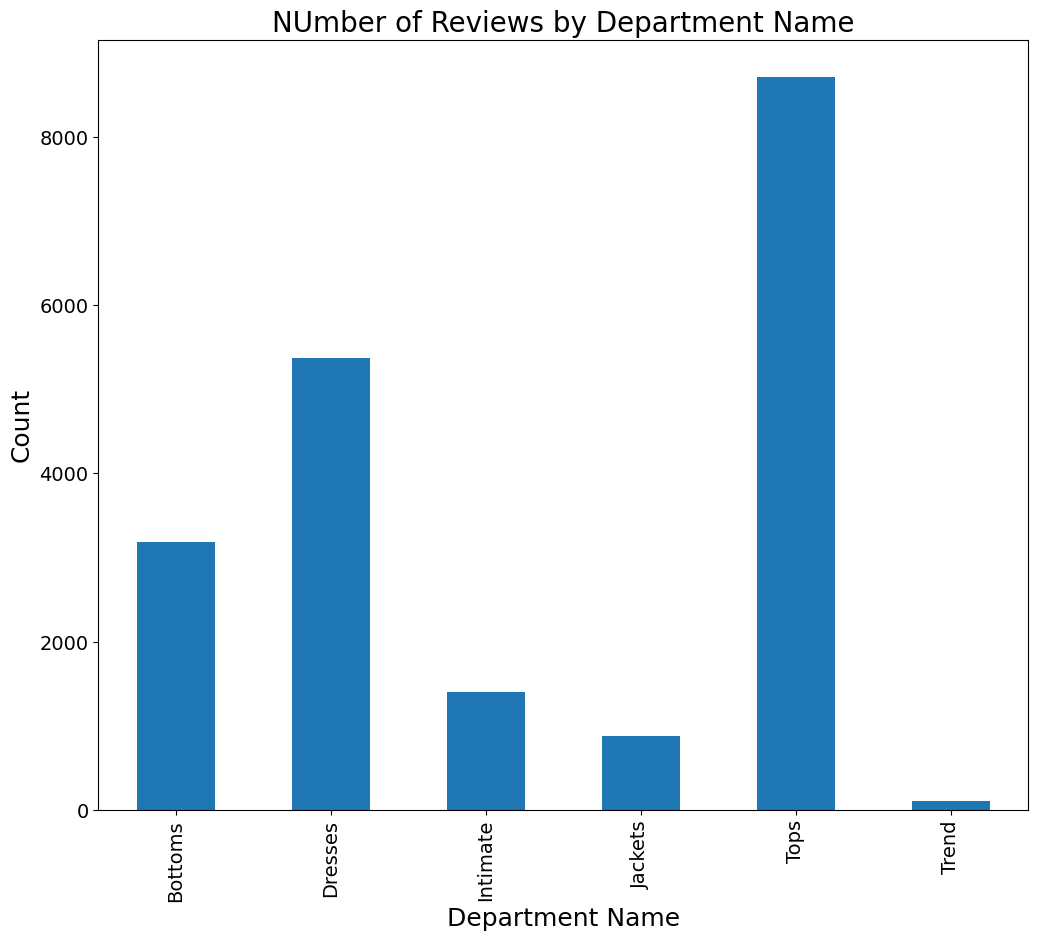

In [6]:
ax = df_clothes['Department Name'].value_counts().sort_index().plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('NUmber of Reviews by Department Name', fontsize=20)
ax.set_xlabel('Department Name', fontsize=18)
ax.set_ylabel('Count', fontsize=18);
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Class Name and Ratings')

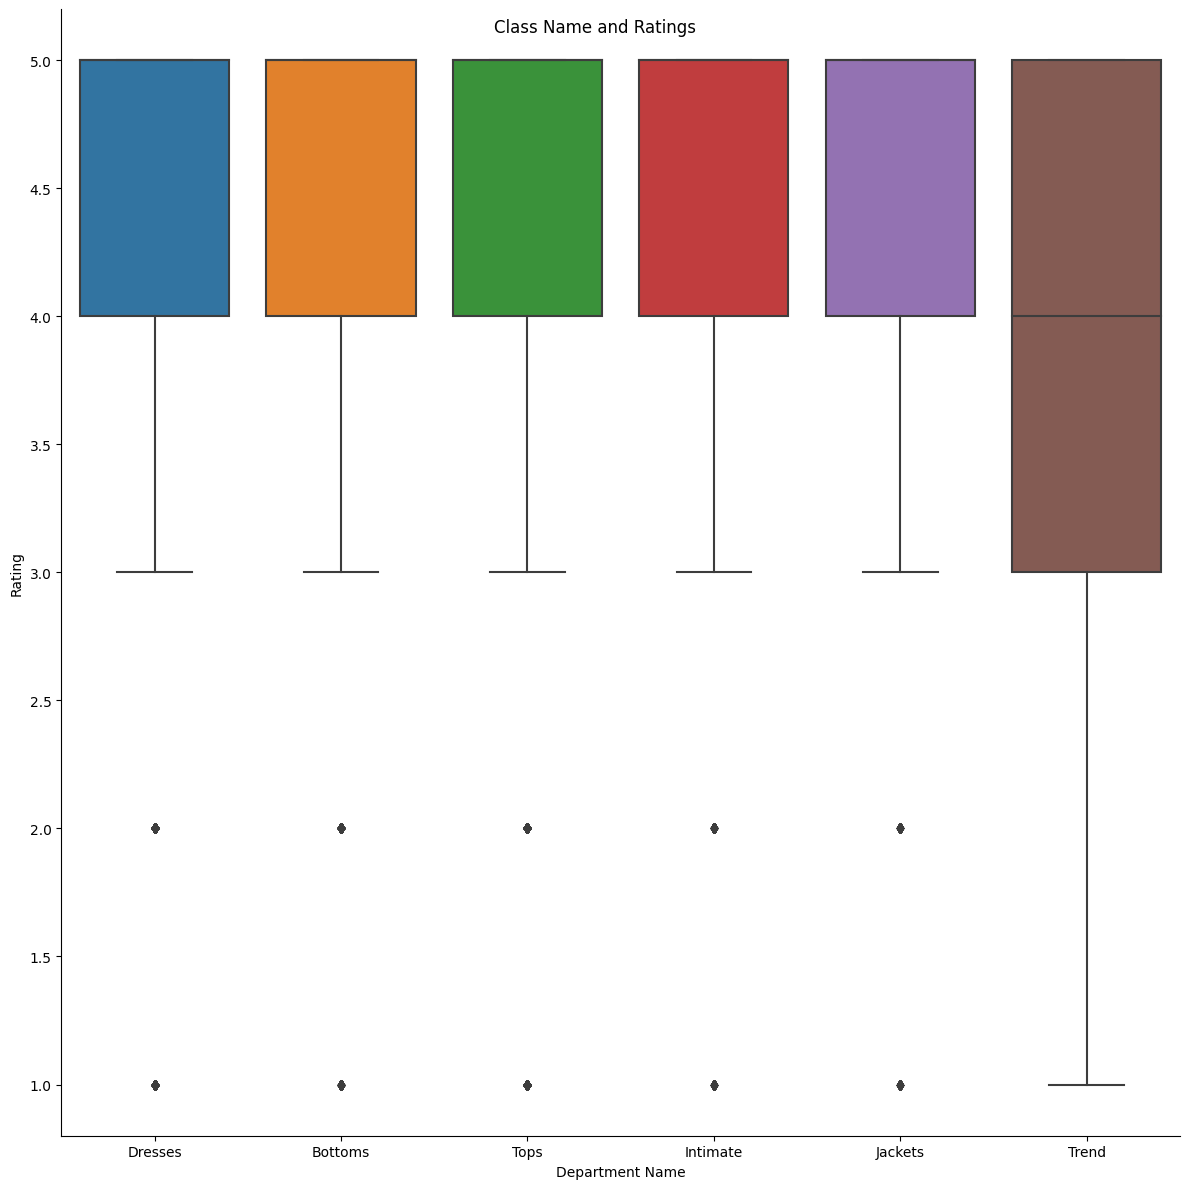

In [7]:
import seaborn as sns
ax = sns.catplot(x='Department Name', y='Rating', kind = 'box', data = df_clothes, height=12, aspect=1)
ax.fig.suptitle('Class Name and Ratings')

In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [9]:
import re

Removing special characters and stop words from review text columns

In [10]:

df_clothes['Review Text'] = df_clothes['Review Text'].apply(lambda x: (re.sub('@[^\s]+-,','', x)))
df_clothes['Review Text'] = df_clothes['Review Text'].apply(lambda x: re.sub(r'\B#\w*[a-zA-Z]+\w*', '', x))
df_clothes['Review Text'] = df_clothes['Review Text'].str.lower()

In [11]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [12]:
nltk.download("stopwords")

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


False

In [13]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


False

In [14]:
stop = stopwords.words('english')
df_clothes["rev_no_stopw"] = df_clothes['Review Text'].apply(lambda x:
                                                            ' '.join([word for word in x.split() if word not in (stop)]))

In [15]:
analyzer= SentimentIntensityAnalyzer()
df_clothes['Compound'] = [analyzer.polarity_scores(a)['compound'] for a in df_clothes["rev_no_stopw"]]
df_clothes['Negative'] = [analyzer.polarity_scores(a)['neg'] for a in df_clothes["rev_no_stopw"]]
df_clothes['Positive'] = [analyzer.polarity_scores(a)['pos'] for a in df_clothes["rev_no_stopw"]]
df_clothes['Neutral'] = [analyzer.polarity_scores(a)['neu'] for a in df_clothes["rev_no_stopw"]]

In [16]:

for a in df_clothes.Compound:
    df_clothes['Analysis'] = df_clothes.Compound.apply(lambda a: 'Positive' if a > 0 else ('Neutral' if a == 0 else 'Negative'))

In [17]:
df_clothes.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,rev_no_stopw,Compound,Negative,Positive,Neutral,Analysis
2,2,1077,60,Some major design flaws,i had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,high hopes dress really wanted work me. initia...,0.9117,0.036,0.259,0.705,Positive
3,3,1049,50,My favorite buy!,"i love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"love, love, love jumpsuit. fun, flirty, fabulo...",0.9511,0.163,0.631,0.206,Positive
4,4,847,47,Flattering shirt,this shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,shirt flattering due adjustable front tie. per...,0.9213,0.000,0.523,0.477,Positive
5,5,1080,49,Not for the very petite,"i love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,"love tracy reese dresses, one petite. 5 feet t...",0.9153,0.000,0.257,0.743,Positive
6,6,858,39,Cagrcoal shimmer fun,i aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,aded basket hte last mintue see would look lik...,0.8439,0.000,0.159,0.841,Positive


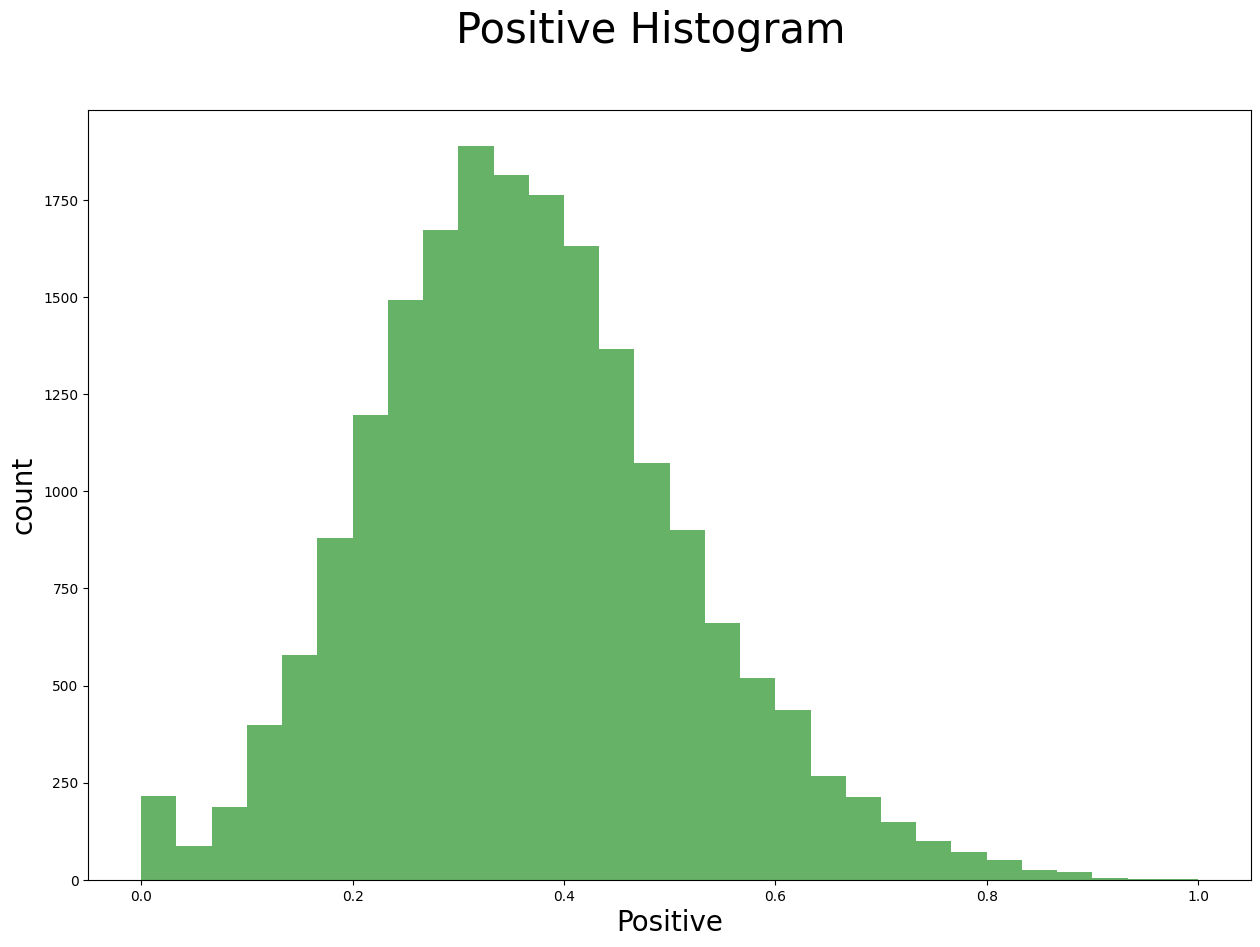

In [18]:
plt.rcParams['figure.figsize'] = (15, 10)
fig, axes = plt.subplots()


plt.hist(df_clothes['Positive'], bins=30, color="green", alpha=0.6)
plt.xlabel("Positive", fontsize=20)
plt.ylabel("count", fontsize=20)
plt.suptitle("Positive Histogram", fontsize=30)

plt.show()

In [19]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [20]:
text = " ".join(review for review in df_clothes.rev_no_stopw.astype(str))
print ("There are {} words in the combination of all cells in column BLOOM.".format(len(text)))

There are 4054866 words in the combination of all cells in column BLOOM.


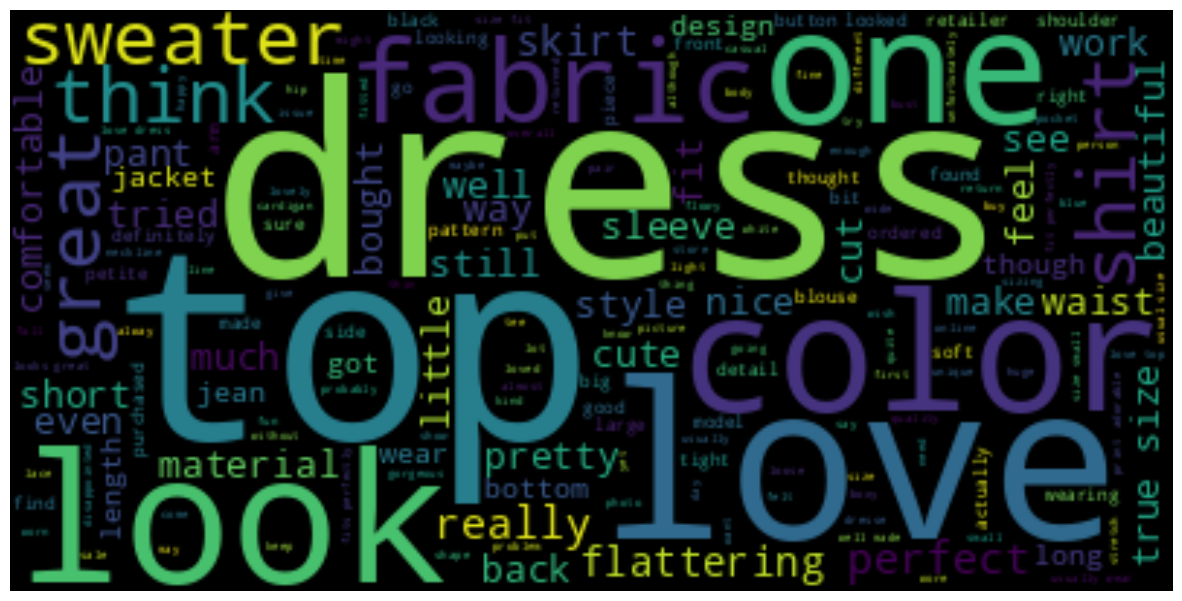

In [21]:
text = text

# word cloud image:
wordcloud = WordCloud().generate(text)

# Display image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

****Random Forest to Predict Sentiment of next Review

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [23]:
vectorizer = TfidfVectorizer (max_features=1000, min_df=7, max_df=0.7, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(df_clothes["Review Text"]).toarray()

In [24]:
labels = df_clothes["Analysis"].values
X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.5, random_state=0)

In [25]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [26]:
y_pred = text_classifier.predict(X_test)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[   4    0  277]
 [   1    3   59]
 [   6    1 9480]]
              precision    recall  f1-score   support

    Negative       0.36      0.01      0.03       281
     Neutral       0.75      0.05      0.09        63
    Positive       0.97      1.00      0.98      9487

    accuracy                           0.97      9831
   macro avg       0.69      0.35      0.37      9831
weighted avg       0.95      0.97      0.95      9831

0.9650086461194182
